<a href="https://colab.research.google.com/github/AdrianGuel/ExploringGAinPIDdesign/blob/main/GeneticAlgorithmandPIDdesign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pygad
!pip install control

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 53 kB 2.4 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 398 kB 25.6 MB/s 
  Created wheel for control: filename=control-0.9.2-py2.py3-none-any.whl size=403205 sha256=730bded4a312bc9a3d4555ab72e7fe308cf2cddb3c7d27c2f1c404822da6f4bb
  Stored in directory: /root/.cache/pip/wheels/48/ef/c2/929bb5c59a1328df00a0561d0e68cd7c8537f33f5ce0ce741b
Successfully built control


/usr/local/lib/python3.7/dist-packages/pygad/pygad.py:486: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resutled in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  if not self.suppress_warnings: warnings.warn("The percentage of genes to mutate (mutation_percent_genes={mutation_percent}) resutled in selecting ({mutation_num}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.".format(mutation_percent=mutation_percent_genes, mutation_num=mutation_num_genes))


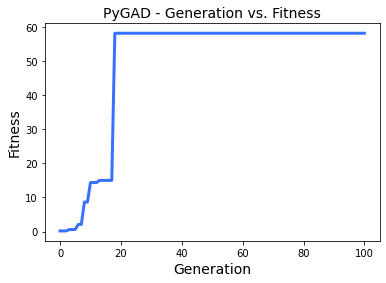

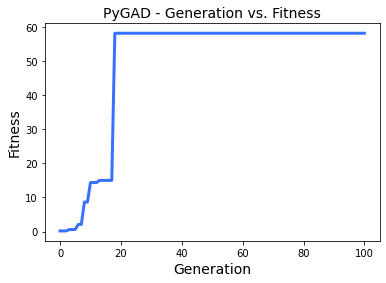

In [ ]:
import pygad
import numpy

function_inputs = [4,-2,3.5,5,-11,-4.7]
desired_output = 44

def fitness_func(solution, solution_idx):
    output = numpy.sum(solution*function_inputs)
    fitness = 1.0 / numpy.abs(output - desired_output)
    return fitness

fitness_function = fitness_func

num_generations = 100
num_parents_mating = 6

sol_per_pop = 8
num_genes = len(function_inputs)

init_range_low = -2
init_range_high = 5

parent_selection_type = "sss"
keep_parents = 1

crossover_type = "single_point"

mutation_type = "random"
mutation_percent_genes = 10

ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       init_range_low=init_range_low,
                       init_range_high=init_range_high,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes)

ga_instance.run()
ga_instance.plot_fitness()


In [ ]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

prediction = numpy.sum(numpy.array(function_inputs)*solution)
print("Predicted output based on the best solution : {prediction}".format(prediction=prediction))

Parameters of the best solution : [ 4.97775765 -0.13380672  1.89533612 -0.39985455 -3.14279705  3.26949073]
Fitness value of the best solution = 58.109502188369845
Predicted output based on the best solution : 44.017208889464555


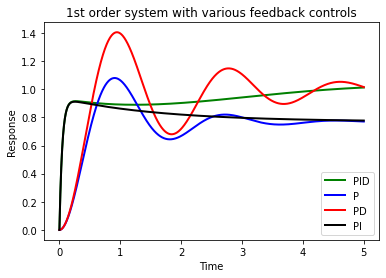

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
import control as ctl 
from control.matlab import step
import numpy as np 

T = np.linspace(0,5,1000)
s = ctl.tf("s")

Kp = 10
Ti = 1 
Td = 2

PID_part = Kp*(1+1/(Ti*s) +(Td*s))
P_Part = Kp
PI_Part = Kp*(1+1/(Ti*s))
PD_Part = Kp*(1+(Td*s))

plant = 1/(s**2+2*s+3)

PID_Plant =  ctl.feedback(PID_part*plant)
P_Plant = ctl.feedback(P_Part*plant)
PI_Plant = ctl.feedback(PI_Part*plant)
PD_Plant = ctl.feedback(PD_Part*plant)

PID_res,t = step(PID_Plant,T)
plt.plot(t,PID_res,color="green",lw=2,label="PID")
P_res, t = step(P_Plant,T)
plt.plot(t,P_res,color="blue",lw=2,label="P")
PI_res, t = step(PI_Plant,T)
plt.plot(t,PI_res,color="red",lw=2,label="PD")
PD_res,t =step(PD_Plant,T)
plt.plot(t,PD_res,color="black",lw=2,label="PI")

plt.legend()
plt.xlabel('Time')
plt.ylabel('Response')
plt.title('1st order system with various feedback controls')


plt.show()

In [ ]:
from numpy import linalg as LA
0.5*LA.norm(numpy.asarray(PID_res)-1)**2


3.0498136066301176

/usr/local/lib/python3.7/dist-packages/pygad/pygad.py:486: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resutled in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  if not self.suppress_warnings: warnings.warn("The percentage of genes to mutate (mutation_percent_genes={mutation_percent}) resutled in selecting ({mutation_num}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.".format(mutation_percent=mutation_percent_genes, mutation_num=mutation_num_genes))


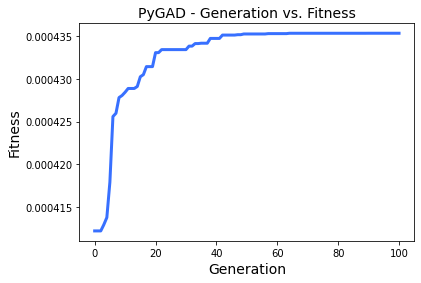

Parameters of the best solution : [1.73559619 0.67511416 0.94822399]
Fitness value of the best solution = 0.0004353787150600638
Predicted output based on the best solution : 8.910940415169275


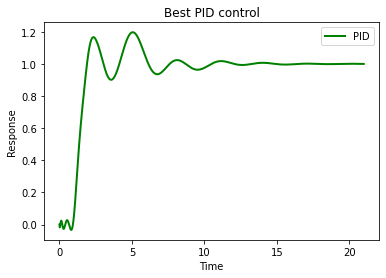

In [ ]:
import pygad
import numpy
import control as ctl 
from control.matlab import step
from numpy import linalg as LA

desired_output = 0
T = np.linspace(0,5,1000)
s = ctl.tf("s")
padenum,padeden=ctl.pade(1,5)
delayaprox=ctl.tf(padenum,padeden)
plant = delayaprox/(s**2+2*s+3)

def fitness_func(solution, solution_idx):
    PID_part = solution[0]*(1+1/(solution[1]*s) +([solution[2]]*s))
    PID_Plant =  ctl.feedback(PID_part*plant)
    PID_res= step(PID_Plant,T)    
    output = 0.5*LA.norm(numpy.asarray(PID_res)-1)**2
    fitness = 1.0 / numpy.abs(output - desired_output)
    return fitness

fitness_function = fitness_func

num_generations = 100
num_parents_mating = 6

sol_per_pop = 8
num_genes = 3

init_range_low = -2
init_range_high = 5

parent_selection_type = "sss"
keep_parents = 1

crossover_type = "single_point"

mutation_type = "random"
mutation_percent_genes = 10

ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       init_range_low=init_range_low,
                       init_range_high=init_range_high,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes)

ga_instance.run()
ga_instance.plot_fitness()

solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

prediction = numpy.sum(numpy.array(function_inputs)*solution)
print("Predicted output based on the best solution : {prediction}".format(prediction=prediction))

Kp = solution[0]
Ti = solution[1] 
Td = solution[2]
PID_part = Kp*(1+1/(Ti*s) +(Td*s))
PID_Plant =  ctl.feedback(PID_part*plant)
PID_res,t = step(PID_Plant)
plt.plot(t,PID_res,color="green",lw=2,label="PID")
plt.legend()
plt.xlabel('Time')
plt.ylabel('Response')
plt.title('Best PID control')
#plt.xlim((0,5))
plt.show()